In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../Datasets/Datasets8/bank-data.csv")
# df.head()
# df.isna().sum()
# df.isna().any()
# df[["age","income"]].corr()
# df.info()

<Axes: xlabel='age', ylabel='income'>

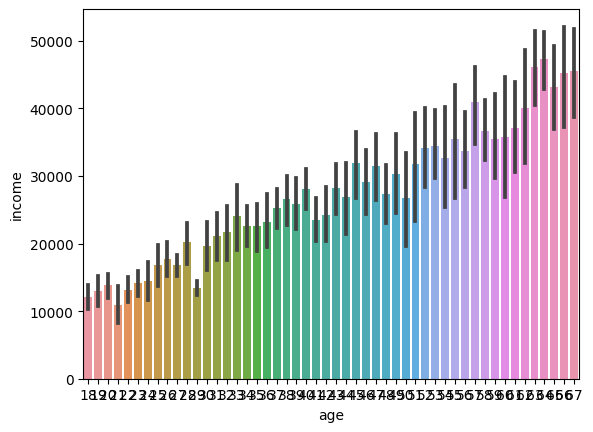

In [5]:
sns.barplot(data = df,x = "age", y="income")

<Axes: xlabel='age', ylabel='income'>

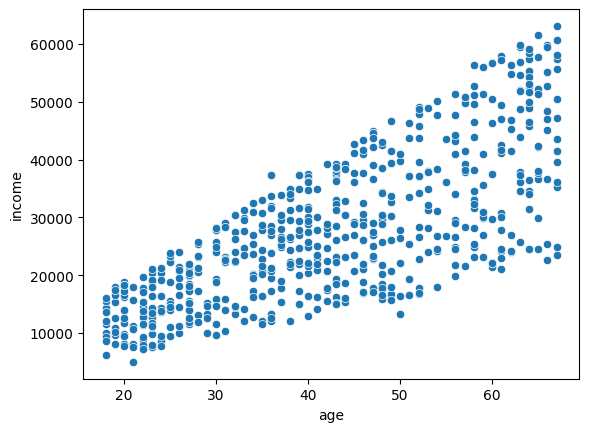

In [6]:
sns.scatterplot(data = df, x = "age", y = 'income')

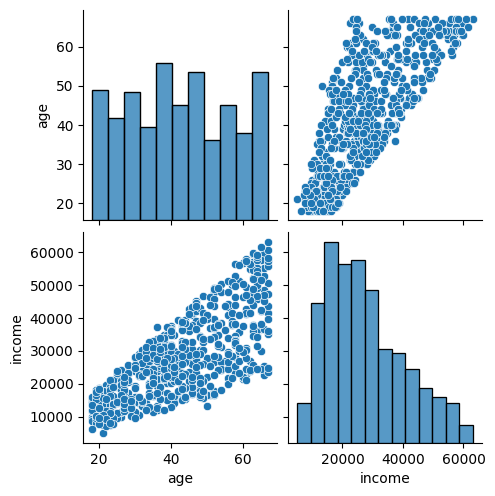

In [7]:
sns.pairplot(data = df[["age","income"]])

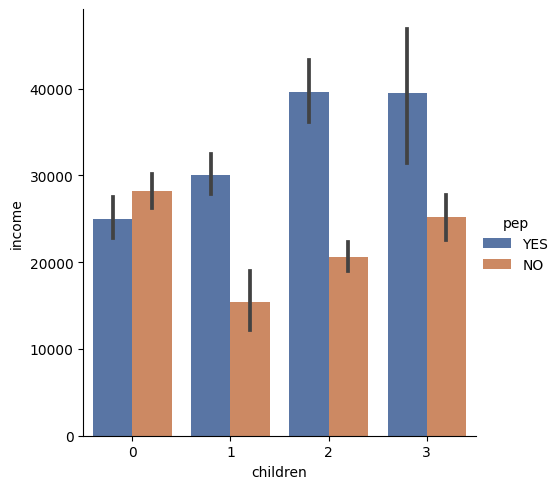

In [10]:
sns.catplot(data = df, x = "children", y = "income", hue = "pep", kind="bar",palette="deep")

In [23]:
bankdata = df.drop("id",axis=1)
bankdata1 =  bankdata.copy()

Questo metodo divide i dati in bin basati sui quantili, in modo che ogni bin contenga approssimativamente lo stesso numero di osservazioni.

In [24]:
bankdata1["age"] = pd.qcut(bankdata['age'], q=11, labels=False)

In [25]:
# bankdata[bankdata["age_binnati"]==0]

In [26]:
# bankdata["age"].min()
# bankdata["age"].max()

In [27]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# df["sex"] = ohe.fit_transform(df[["sex"]]).toarray()
# df["sex"] 

In [28]:
# Applica la codifica one-hot encoding
df_encoded = pd.get_dummies(bankdata1['region'], prefix='region')

# Concatena il dataframe originale con quello codificato
df_concat = pd.concat([bankdata1, df_encoded], axis=1)

# Rimuove la colonna originale "Gender"
bankdata1 = df_concat.drop('region', axis=1)

bankdata1['sex'] = bankdata1['sex'].map({'FEMALE': 0, 'MALE': 1})
bankdata1['married'] = bankdata1['married'].map({'NO': 0, 'YES': 1})
bankdata1['car'] = bankdata1['car'].map({'NO': 0, 'YES': 1})
bankdata1['save_act'] = bankdata1['save_act'].map({'NO': 0, 'YES': 1})
bankdata1['current_act'] = bankdata1['current_act'].map({'NO': 0, 'YES': 1})
bankdata1['mortgage'] = bankdata1['mortgage'].map({'NO': 0, 'YES': 1})
bankdata1['pep'] = bankdata1['pep'].map({'NO': 0, 'YES': 1})

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def classificazione(dataframe):
    x = dataframe.drop("pep",axis=1)
    y= dataframe["pep"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
    
    y_test.value_counts()
    
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    
    plt.hist([y_pred,y_test], bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left")
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.title("Decision Tree Classifier")
    plt.legend()
    plt.show()

in questo caso l'algoritmo decision tree ha effettuato automaticamente il processo di pruning dell'albero

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def classificazione1(dataframe):
    x = dataframe.drop("pep",axis=1)
    y= dataframe["pep"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
    
    y_test.value_counts()
    
    classifier = DecisionTreeClassifier(max_depth = None)
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    
    plt.hist([y_pred,y_test], bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left")
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.title("Decision Tree Classifier")
    plt.legend()
    plt.show()

in questo caso invece abbiamo effettuato la classificazione senza aver effettuato il pruning

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def classificazione2(dataframe):
    x = dataframe.drop("pep",axis=1)
    y= dataframe["pep"]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
    
    y_test.value_counts()
    
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)

    scores = cross_val_score(classifier, x, y, cv=10)
    ciao = pd.DataFrame(scores)
    ciao.hist()
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

con il cross validation vediamo quali sono i valori dell'accuracy che il nostro classificatore ha performato durante i 10 test 

proviamo a fare gli stessi test sul dataframe non discretizzato

In [32]:
# Applica la codifica one-hot encoding
df_encoded = pd.get_dummies(bankdata['region'], prefix='region')
# Concatena il dataframe originale con quello codificato
df_concat = pd.concat([bankdata, df_encoded], axis=1)
# Rimuove la colonna originale "Gender"
bankdata = df_concat.drop('region', axis=1)

bankdata['sex'] = bankdata['sex'].map({'FEMALE': 0, 'MALE': 1})
bankdata['married'] = bankdata['married'].map({'NO': 0, 'YES': 1})
bankdata['car'] = bankdata['car'].map({'NO': 0, 'YES': 1})
bankdata['save_act'] = bankdata['save_act'].map({'NO': 0, 'YES': 1})
bankdata['current_act'] = bankdata['current_act'].map({'NO': 0, 'YES': 1})
bankdata['mortgage'] = bankdata['mortgage'].map({'NO': 0, 'YES': 1})
bankdata['pep'] = bankdata['pep'].map({'NO': 0, 'YES': 1})

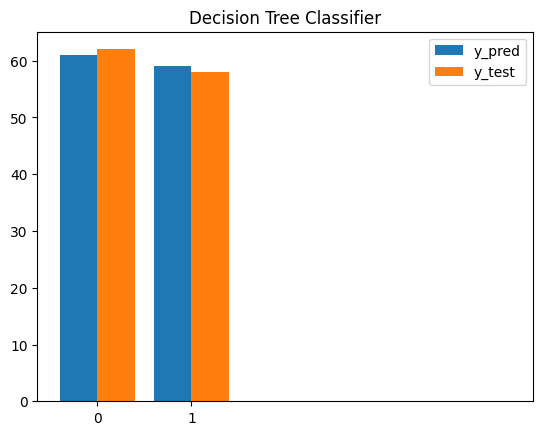

In [33]:
classificazione(bankdata1)

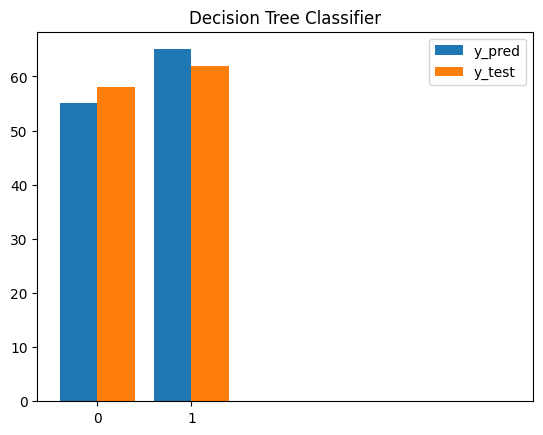

In [34]:
classificazione1(bankdata1)

Accuracy: 0.82 (+/- 0.07)


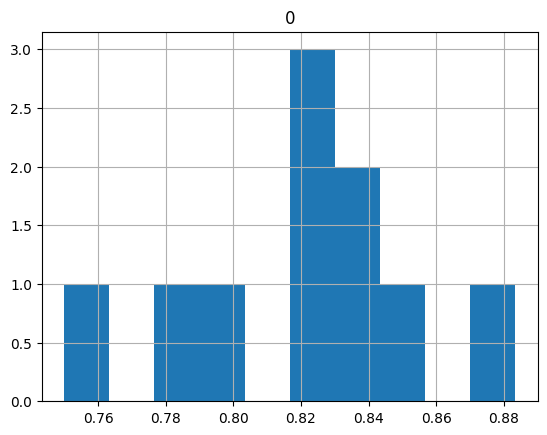

In [35]:
classificazione2(bankdata1)

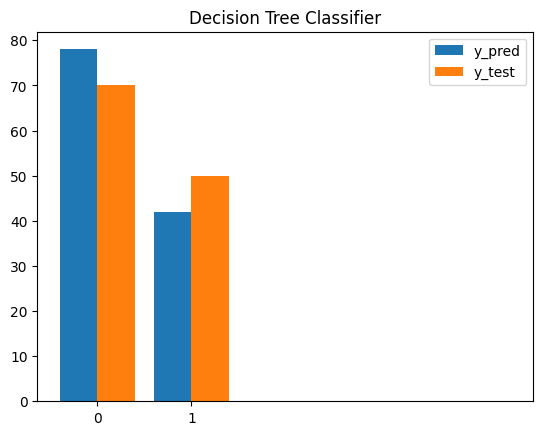

In [36]:
classificazione(bankdata)

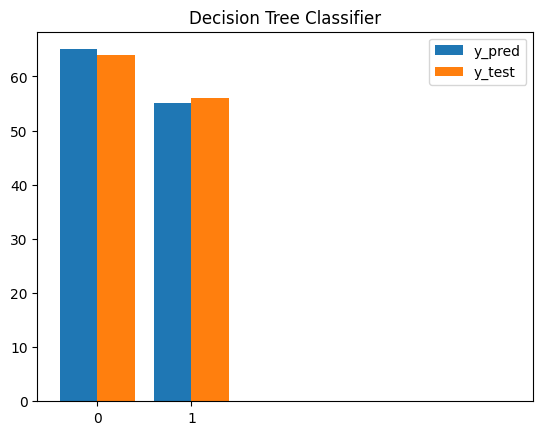

In [37]:
classificazione1(bankdata)

Accuracy: 0.81 (+/- 0.11)


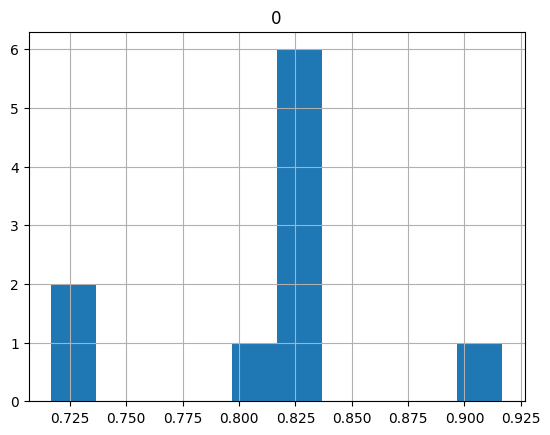

In [38]:
classificazione2(bankdata)

Andiamo ora a discretizzare anche l'attributo income, andando a vedere come si comporta il classificatore in questo caso

In [39]:
bankdata1["income"] = pd.qcut(bankdata1['income'], q=11, labels=False)

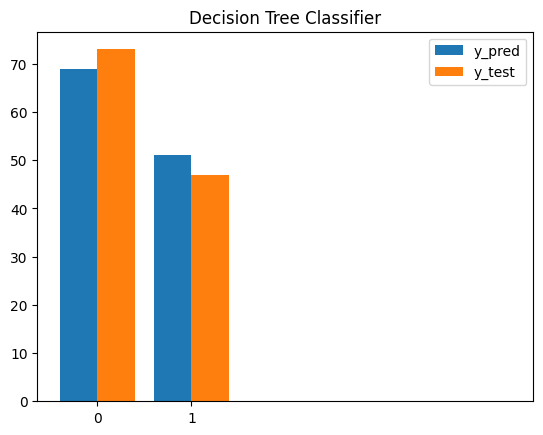

In [40]:
classificazione(bankdata1)

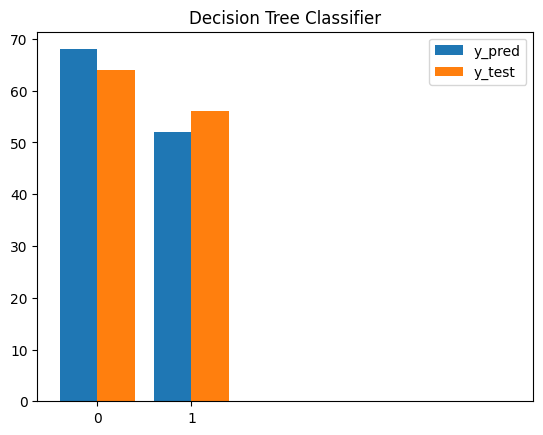

In [41]:
classificazione1(bankdata1)

Accuracy: 0.81 (+/- 0.08)


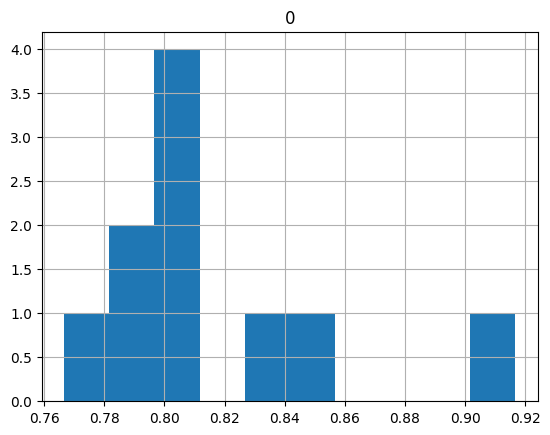

In [42]:
classificazione2(bankdata1)